# Create dataset suitable for SAM

In [1]:
from datasets import Dataset, Image as DatasetsImage
import transformers

import torch
from transformers import SamModel, SamProcessor

import numpy as np
import glob
from PIL import Image
from tifffile import imread
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import os
from skimage import io, transform

In [2]:
def create_dataset(images, labels):
    # Creates a dataset from the provided images and labels. 
    # The dataset is created using the `Dataset.from_dict()` method, 
    # which takes a dictionary of data columns. 
    # The "image" and "label" columns are then cast to the `Image` data type.
    dataset = Dataset.from_dict({"image": images, 
                                 "label": labels})
    dataset.cast_column("image", DatasetsImage())
    dataset.cast_column("label", DatasetsImage())

    return dataset

In [3]:
image_folder = "/home/hpc/iwi5/iwi5171h/data_processing/calculated_dataset/stardist_dataset/closest_vertex_dataset/closest_vertex_high_degree_only_120/train/images/"
mask_folder = "/home/hpc/iwi5/iwi5171h/data_processing/calculated_dataset/stardist_dataset/closest_vertex_dataset/closest_vertex_high_degree_only_120/train/masks/"


image_filename = sorted(glob.glob(image_folder + "*.tif"))
mask_filename = sorted(glob.glob(mask_folder + "*.tif"))

# #print(image_filename)
# images = list(map(imread, image_filename))
# labels = list(map(imread, mask_filename))

# Load images and masks
# images = [io.imread(img_path) for img_path in image_filename]
# labels = [io.imread(mask_path) for mask_path in mask_filename]

# Convert to numpy arrays
# images = np.array(images)
# labels = np.array(labels)

############################################
def resize_image(image, target_size=(256, 256)):
    return transform.resize(image, target_size, preserve_range=True, anti_aliasing=True).astype(image.dtype)

def resize_mask(mask, target_size=(256, 256)):
    return transform.resize(mask, target_size, order=0, preserve_range=True, anti_aliasing=False).astype(mask.dtype)

images = [resize_image(io.imread(img_path)) for img_path in image_filename]
labels = [resize_mask(io.imread(mask_path)) for mask_path in mask_filename]
##############################################

# Create the dataset
dataset = create_dataset(images, labels)


/home/woody/iwi5/iwi5171h/software/privat/conda/envs/medsam/lib/python3.10/site-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


In [4]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 66
})

In [5]:
df = dataset.to_pandas()
df

,image,label
0,"[[112, 112, 113, 114, 115, 116, 117, 119, 121,...","[[216, 216, 216, 216, 216, 216, 216, 216, 216,..."
1,"[[118, 118, 120, 122, 121, 118, 111, 104, 98, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 223, 223, 22..."
2,"[[98, 98, 97, 98, 99, 101, 105, 110, 117, 125,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[144, 144, 147, 149, 150, 150, 150, 150, 149,...","[[213, 213, 213, 213, 213, 213, 0, 0, 0, 0, 0,..."
4,"[[137, 137, 136, 135, 137, 140, 147, 153, 158,...","[[223, 223, 223, 223, 223, 223, 223, 223, 223,..."
...,...,...
61,"[[103, 104, 100, 97, 93, 90, 93, 96, 109, 121,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
62,"[[134, 134, 132, 131, 133, 135, 135, 135, 133,...","[[175, 175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
63,"[[134, 135, 128, 122, 118, 114, 113, 112, 125,...","[[172, 172, 172, 172, 172, 172, 172, 172, 172,..."
64,"[[109, 109, 111, 114, 122, 129, 135, 140, 142,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [6]:
type(df['image'].iloc[0]), type(df['label'].iloc[0])

(numpy.ndarray, numpy.ndarray)

In [7]:
df['image'].iloc[0].shape, df['label'].iloc[0].shape

((256,), (256,))

In [8]:
img = dataset[0]["image"]
img.ndim

AttributeError: 'list' object has no attribute 'ndim'

(256, 256)


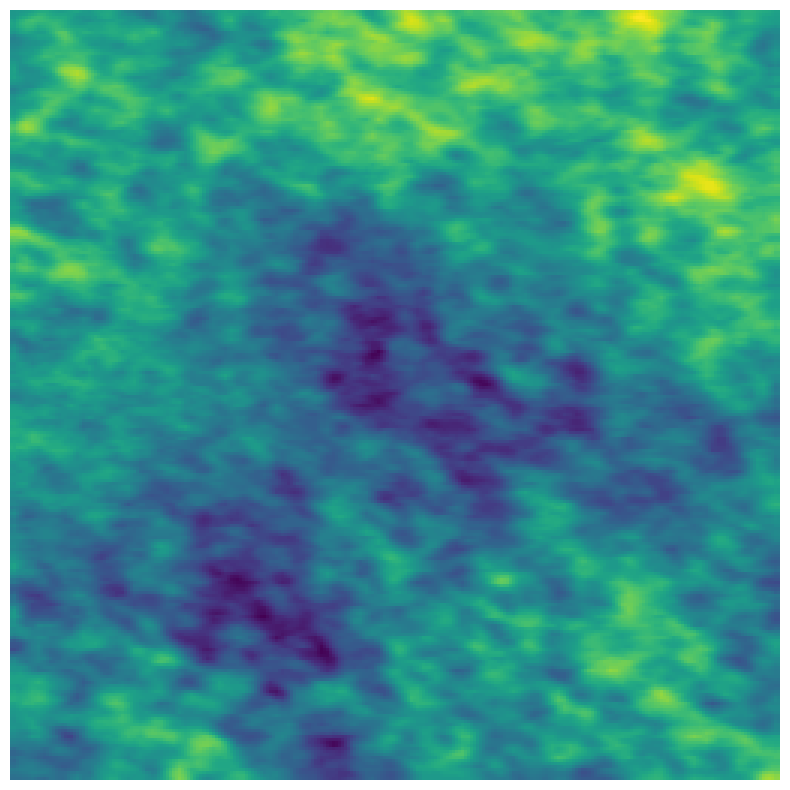

In [9]:
# Get the image from the dataset
img = dataset[0]["image"]


# Convert to numpy array if it's a list
if isinstance(img, list):
    img = np.array(img)

print(img.shape)
# Convert to PIL Image
img = Image.fromarray(img.astype('uint8'))


# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


#print(np.array(img))

In [10]:
np.unique(np.array(dataset[0]["label"]))

array([  0,   5,   6,   7,  10,  12,  20,  24,  26,  27,  28,  32,  34,
        35,  38,  43,  49,  53,  55,  56,  58,  59,  61,  62,  65,  69,
        72,  75,  76,  83,  84,  85,  90,  93,  96,  99, 103, 105, 106,
       108, 112, 114, 115, 121, 122, 124, 126, 129, 131, 135, 136, 137,
       142, 144, 146, 150, 153, 155, 164, 165, 167, 170, 172, 176, 177,
       178, 180, 182, 184, 188, 193, 194, 195, 198, 199, 202, 203, 204,
       208, 210, 212, 214, 215, 216, 217, 219, 220, 223, 227, 228, 229,
       232, 235, 236, 237, 238, 240, 241, 242, 243, 248, 250, 252, 253,
       254])

In [11]:
#print(type(dataset[0]["image"]))
h = np.array(dataset[0]["label"])
h.shape

(256, 256)

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = SamProcessor.from_pretrained("wanglab/medsam-vit-base")
model = SamModel.from_pretrained("wanglab/medsam-vit-base").to(device)

In [ ]:
print(device)

cpu


In [13]:
# load ground truth segmentation
ground_truth_seg = np.array(dataset[0]["label"])
np.unique(ground_truth_seg)

array([  0,   5,   6,   7,  10,  12,  20,  24,  26,  27,  28,  32,  34,
        35,  38,  43,  49,  53,  55,  56,  58,  59,  61,  62,  65,  69,
        72,  75,  76,  83,  84,  85,  90,  93,  96,  99, 103, 105, 106,
       108, 112, 114, 115, 121, 122, 124, 126, 129, 131, 135, 136, 137,
       142, 144, 146, 150, 153, 155, 164, 165, 167, 170, 172, 176, 177,
       178, 180, 182, 184, 188, 193, 194, 195, 198, 199, 202, 203, 204,
       208, 210, 212, 214, 215, 216, 217, 219, 220, 223, 227, 228, 229,
       232, 235, 236, 237, 238, 240, 241, 242, 243, 248, 250, 252, 253,
       254])

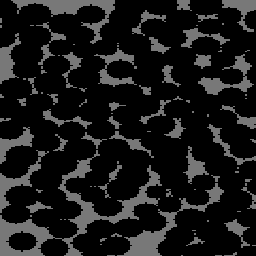

In [14]:
# a random color palette mapping each class to a color (RGB)
palette = [[120, 120, 120], [6, 230, 230]]

color_seg = np.zeros((ground_truth_seg.shape[0], ground_truth_seg.shape[1], 3), dtype=np.uint8) # height, width, 3

for label, color in enumerate(palette):
    color_seg[ground_truth_seg == label, :] = color

Image.fromarray(color_seg)

In [15]:
import numpy as np
from skimage.measure import label

def convert_mask_to_instances(mask):
    # Label connected components
    labeled_mask = label(mask)
    
    # Get unique labels (excluding background 0)
    unique_labels = np.unique(labeled_mask)[1:]
    
    # Create instance masks
    instance_masks = np.array([(labeled_mask == label).astype(int) for label in unique_labels])
    
    return instance_masks

# Example usage
ground_truth = ground_truth_seg
instance_masks = convert_mask_to_instances(ground_truth)
# instance_masks shape: (num_instances, 256, 256)

print(f"Number of instances: {instance_masks.shape[0]}")

Number of instances: 131


In [16]:
instance_masks.shape

(131, 256, 256)

In [ ]:
# def get_bounding_box(ground_truth_map):
#   # get bounding box from mask
#   y_indices, x_indices = np.where(ground_truth_map > 0)
#   x_min, x_max = np.min(x_indices), np.max(x_indices)
#   y_min, y_max = np.min(y_indices), np.max(y_indices)
#   # add perturbation to bounding box coordinates
#   H, W = ground_truth_map.shape
#   x_min = max(0, x_min - np.random.randint(0, 20))
#   x_max = min(W, x_max + np.random.randint(0, 20))
#   y_min = max(0, y_min - np.random.randint(0, 20))
#   y_max = min(H, y_max + np.random.randint(0, 20))
#   bbox = [x_min, y_min, x_max, y_max]

#   return bbox

# input_boxes = get_bounding_box(ground_truth_seg)
# input_boxes

In [17]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

def show_boxes_on_image(raw_image, boxes):
    plt.figure(figsize=(10,10))
    plt.imshow(raw_image)
    for box in boxes:
      show_box(box, plt.gca())
    plt.axis('on')
    plt.show()

In [30]:
instance_masks

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [28]:


def get_bounding_box(ground_truth_map):
    # Find all unique labels, excluding the background (usually 0)
    unique_labels = np.unique(ground_truth_map)
    unique_labels = unique_labels[unique_labels != 0]
    
    bounding_boxes = []
    
    for label in unique_labels:
        # Create a binary mask for this label
        binary_mask = (ground_truth_map == label)
        
        # Find properties of connected regions
        props = measure.regionprops(binary_mask.astype(int))
        
        if props:
            # Get bounding box
            minr, minc, maxr, maxc = props[0].bbox
            
            # Add perturbation to bounding box coordinates
            H, W = ground_truth_map.shape
            minc = max(0, minc - np.random.randint(0, 20))
            maxc = min(W, maxc + np.random.randint(0, 20))
            minr = max(0, minr - np.random.randint(0, 20))
            maxr = min(H, maxr + np.random.randint(0, 20))
            
            # Append bounding box in the format [x_min, y_min, x_max, y_max]
            bounding_boxes.append([minc, minr, maxc, maxr])
    
    return bounding_boxes

# Use the function
ground_truth_seg = np.array(dataset[0]["label"])
input_boxes = get_bounding_box(instance_masks)

# Display the results
print(f"Number of bounding boxes: {len(input_boxes)}")
print("Bounding boxes:", input_boxes)

# Visualize the bounding boxes on the image
image = dataset[0]["image"]
show_boxes_on_image(image, input_boxes)

ValueError: too many values to unpack (expected 4)

105
Number of bounding boxes: 104
Bounding boxes: [[220, 40, 246, 55], [41, 55, 251, 144], [164, 45, 197, 65], [109, 83, 142, 104], [0, 7, 255, 223], [55, 87, 210, 205], [66, 66, 101, 88], [28, 118, 57, 135], [139, 131, 168, 149], [175, 81, 206, 99], [38, 238, 69, 255], [49, 100, 142, 123], [6, 231, 37, 251], [156, 195, 182, 212], [38, 150, 78, 174], [115, 165, 150, 186], [188, 0, 223, 16], [237, 160, 255, 178], [132, 50, 168, 68], [96, 138, 131, 159], [47, 30, 255, 238], [0, 120, 208, 229], [75, 4, 106, 24], [188, 92, 223, 115], [128, 94, 161, 116], [79, 55, 106, 71], [203, 154, 238, 175], [245, 84, 255, 98], [205, 201, 238, 222], [32, 72, 255, 255], [113, 0, 144, 13], [164, 8, 200, 31], [62, 138, 95, 160], [30, 100, 112, 227], [0, 14, 31, 33], [203, 230, 242, 255], [117, 149, 150, 168], [218, 189, 253, 210], [4, 145, 40, 166], [117, 120, 148, 139], [4, 184, 37, 205], [0, 28, 165, 87], [209, 29, 255, 68], [190, 173, 214, 189], [241, 227, 255, 244], [0, 77, 33, 98], [64, 25, 95, 43], [

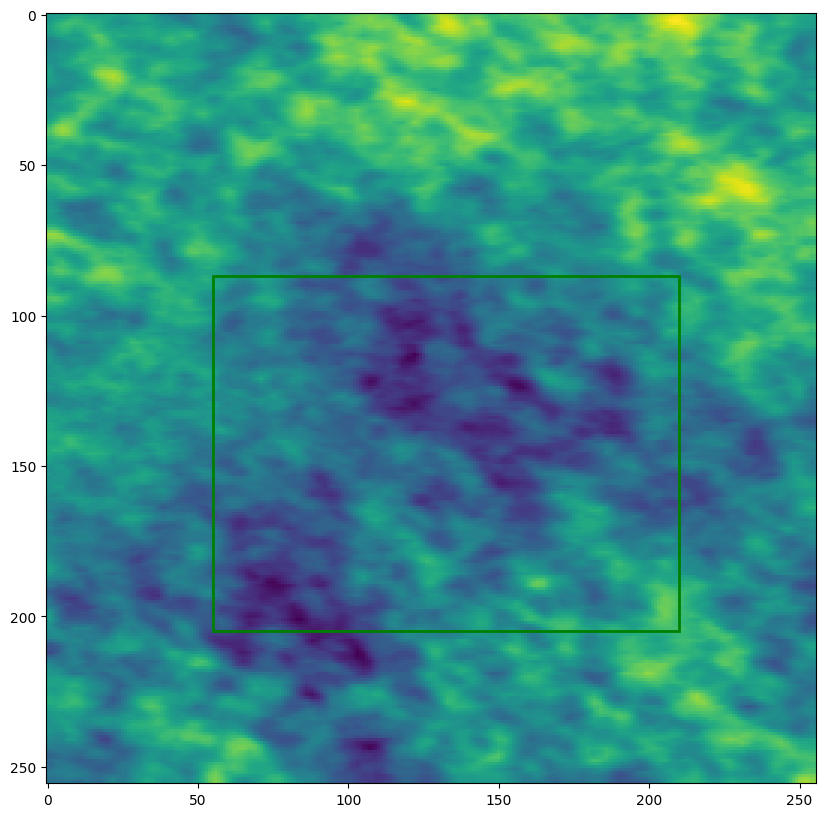

In [27]:
def get_bounding_box(ground_truth_map):
    # Get unique labels, excluding the background (usually 0)
    unique_labels = np.unique(ground_truth_map)
    print(len(unique_labels))
    unique_labels = unique_labels[unique_labels != 0]
    
    bounding_boxes = []
    
    for label in unique_labels:
        # Create a binary mask for this label
        binary_mask = (ground_truth_map == label)
        
        # Get bounding box from mask
        y_indices, x_indices = np.where(binary_mask)
        
        if len(x_indices) == 0 or len(y_indices) == 0:
            continue  # Skip if no pixels found for this label
        
        x_min, x_max = np.min(x_indices), np.max(x_indices)
        y_min, y_max = np.min(y_indices), np.max(y_indices)
        
        # Add perturbation to bounding box coordinates
        # H, W = ground_truth_map.shape
        # x_min = max(0, x_min - np.random.randint(0, 20))
        # x_max = min(W - 1, x_max + np.random.randint(0, 20))
        # y_min = max(0, y_min - np.random.randint(0, 20))
        # y_max = min(H - 1, y_max + np.random.randint(0, 20))
        
        bbox = [x_min, y_min, x_max, y_max]
        bounding_boxes.append(bbox)
    
    return bounding_boxes


# Use the function
ground_truth_seg = np.array(dataset[0]["label"])
input_boxes = get_bounding_box(ground_truth_seg)

# Display the results
print(f"Number of bounding boxes: {len(input_boxes)}")
print("Bounding boxes:", input_boxes)

# Visualize the bounding boxes on the image
image = dataset[0]["image"]
show_boxes_on_image(image, [input_boxes[5]])

In [ ]:
# image = dataset[0]["image"]
# show_boxes_on_image(image, [input_boxes])

In [ ]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = np.array(item["image"])
    #Ensure image is 3D (H, W, C)
    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)  # Add channel dimension
        image = np.repeat(image, 3, axis=-1)  # Repeat to get 3 channels
    elif len(image.shape) == 3 and image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)  # Repeat to get 3 channels
        

    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    instance_masks = convert_mask_to_instances(ground_truth_mask)

    #----------------------------------------

    # add ground truth segmentation
    inputs["ground_truth_mask"] = instance_masks #ground_truth_mask

    # add ground truth segmentation
    #inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [ ]:
from transformers import SamProcessor

processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [ ]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [ ]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([104, 4])
ground_truth_mask (131, 256, 256)


In [ ]:
example.items()

dict_items([('pixel_values', tensor([[[-0.1999, -0.1999, -0.1999,  ..., -0.0972, -0.0972, -0.0972],
         [-0.1999, -0.1999, -0.1999,  ..., -0.0972, -0.0972, -0.0972],
         [-0.1999, -0.1999, -0.1999,  ..., -0.0972, -0.0972, -0.0972],
         ...,
         [-0.5938, -0.5938, -0.5938,  ...,  0.5364,  0.5364,  0.5364],
         [-0.5938, -0.5938, -0.5938,  ...,  0.5364,  0.5364,  0.5364],
         [-0.5938, -0.5938, -0.5938,  ...,  0.5364,  0.5364,  0.5364]],

        [[-0.0749, -0.0749, -0.0749,  ...,  0.0301,  0.0301,  0.0301],
         [-0.0749, -0.0749, -0.0749,  ...,  0.0301,  0.0301,  0.0301],
         [-0.0749, -0.0749, -0.0749,  ...,  0.0301,  0.0301,  0.0301],
         ...,
         [-0.4776, -0.4776, -0.4776,  ...,  0.6779,  0.6779,  0.6779],
         [-0.4776, -0.4776, -0.4776,  ...,  0.6779,  0.6779,  0.6779],
         [-0.4776, -0.4776, -0.4776,  ...,  0.6779,  0.6779,  0.6779]],

        [[ 0.1476,  0.1476,  0.1476,  ...,  0.2522,  0.2522,  0.2522],
         [ 0.147

In [ ]:
# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [ ]:
# from torch.utils.data import DataLoader
# def collate_fn(batch):
#     # Separate different items in the batch
#     pixel_values = [item['pixel_values'] for item in batch]
#     input_boxes = [item['input_boxes'] for item in batch]
#     ground_truth_masks = [item['ground_truth_mask'] for item in batch]

#     # Pad and stack pixel_values
#     pixel_values = torch.stack(pixel_values)

#     # Pad input_boxes to the same size
#     max_boxes = max(boxes.size(0) for boxes in input_boxes)
#     input_boxes_padded = torch.stack([
#         torch.nn.functional.pad(boxes, (0, 0, 0, max_boxes - boxes.size(0)))
#         for boxes in input_boxes
#     ])

#     # Stack ground truth masks
#     ground_truth_masks = torch.stack([torch.from_numpy(mask) for mask in ground_truth_masks])

#     return {
#         'pixel_values': pixel_values,
#         'input_boxes': input_boxes_padded,
#         'ground_truth_mask': ground_truth_masks
#     }

# # Create the DataLoader with the custom collate function
# train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

In [ ]:
import torch
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

def collate_fn(batch):
    # Separate different items in the batch
    pixel_values = [item['pixel_values'] for item in batch]
    input_boxes = [item['input_boxes'] for item in batch]
    ground_truth_masks = [torch.from_numpy(item['ground_truth_mask']) for item in batch]

    # Pad and stack pixel_values
    pixel_values = torch.stack(pixel_values)

    # Pad input_boxes to the same size
    max_boxes = max(boxes.size(0) for boxes in input_boxes)
    input_boxes_padded = torch.stack([
        torch.nn.functional.pad(boxes, (0, 0, 0, max_boxes - boxes.size(0)))
        for boxes in input_boxes
    ])

    # Pad ground truth masks to the same size
    max_h = max(mask.size(0) for mask in ground_truth_masks)
    max_w = max(mask.size(1) for mask in ground_truth_masks)
    ground_truth_masks_padded = torch.stack([
        torch.nn.functional.pad(mask, (0, max_w - mask.size(1), 0, max_h - mask.size(0)))
        for mask in ground_truth_masks
    ])

    return {
        'pixel_values': pixel_values,
        'input_boxes': input_boxes_padded,
        'ground_truth_mask': ground_truth_masks_padded
    }

# Update the DataLoader with the new collate_fn
#train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 1024, 1024])
original_sizes torch.Size([1, 2])
reshaped_input_sizes torch.Size([1, 2])
input_boxes torch.Size([1, 64, 4])
ground_truth_mask torch.Size([1, 256, 256])


In [ ]:
batch["ground_truth_mask"].shape

torch.Size([1, 256, 256])

In [ ]:
from transformers import SamModel 
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [ ]:
from torch.optim import Adam
import monai

# Note: Hyperparameter tuning could improve performance here
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)

seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [ ]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize
from torch.nn.functional import interpolate

num_epochs = 10
best_loss = float('inf')
#save_path = 'best_model.pth'
save_path = 'best_mask_decoder.pth'

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)
      
      print("pred_masks shape:", outputs.pred_masks.shape)
      print("iou_scores shape:", outputs.iou_scores.shape)
      print("low_res_logits shape:", outputs.low_res_logits.shape)
      

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      # Resize ground truth masks to match predicted masks
      ground_truth_masks = interpolate(ground_truth_masks.unsqueeze(1), 
                                        size=predicted_masks.shape[-2:], 
                                        mode='nearest')  # Shape: [B, 1, H, W]


      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    mean_loss = mean(epoch_losses)
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean_loss}')

    # # Save the model if it's the best so far
    # if mean_loss < best_loss:
    #     best_loss = mean_loss
    #     torch.save({
    #         'epoch': epoch,
    #         'model_state_dict': model.state_dict(),
    #         'optimizer_state_dict': optimizer.state_dict(),
    #         'loss': best_loss,
    #     }, save_path)
    #     print(f'Model saved to {save_path}')

    # Save the model if it's the best so far
    if mean_loss < best_loss:
        best_loss = mean_loss
        torch.save({
            'epoch': epoch,
            'mask_decoder_state_dict': model.mask_decoder.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_loss,
        }, save_path)
        print(f'Mask decoder saved to {save_path}')


print("Training completed. Best model saved.")

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:14<?, ?it/s]


AssertionError: ground truth has different shape (torch.Size([1, 1, 1, 256, 256])) from input (torch.Size([1, 75, 1, 256, 256]))

In [ ]:
# New training script
num_epochs = 100
best_loss = float('inf')
#save_path = 'best_model.pth'
save_path = 'best_mask_decoder.pth'

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=True)

      # compute loss
      predicted_masks = outputs.pred_masks #.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      # Resize ground truth masks to match predicted masks
      ground_truth_masks = interpolate(ground_truth_masks.unsqueeze(1), 
                                        size=predicted_masks.shape[-2:], 
                                        mode='nearest')  # Shape: [B, 1, H, W]
      
      
      # Ensure both tensors have the same batch size
      batch_size = min(predicted_masks.shape[0], ground_truth_masks.shape[0])
      #num_masks = predicted_masks.shape[1]
      predicted_masks = predicted_masks[:batch_size]
      ground_truth_masks = ground_truth_masks[:batch_size]

      # Repeat ground truth masks to match the number of predicted masks
      ground_truth_masks = ground_truth_masks.repeat(1, predicted_masks.shape[1], 1, 1, 1)


      # Flatten the mask dimension into the batch dimension
      predicted_masks = predicted_masks.reshape(-1, 1, *predicted_masks.shape[-2:])
      ground_truth_masks = ground_truth_masks.reshape(-1, 1, *ground_truth_masks.shape[-2:])
  
      #Ensure both tensors have the same number of elements in the first dimension
      min_masks = min(predicted_masks.shape[0], ground_truth_masks.shape[0])
      predicted_masks = predicted_masks[:min_masks]
      ground_truth_masks = ground_truth_masks[:min_masks]

      #loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))
      loss = seg_loss(predicted_masks, ground_truth_masks)

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    mean_loss = mean(epoch_losses)
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean_loss}')

 
    # Save the model if it's the best so far
    if mean_loss < best_loss:
        best_loss = mean_loss
        torch.save({
            'epoch': epoch,
            'mask_decoder_state_dict': model.mask_decoder.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_loss,
        }, save_path)
        print(f'Mask decoder saved to {save_path}')


print("Training completed. Best model saved.")



  3%|▎         | 2/66 [01:18<41:52, 39.27s/it]


KeyboardInterrupt: 

In [ ]:
from transformers import SamModel

# Load the model architecture
model = SamModel.from_pretrained("facebook/sam-vit-base")

# Load the saved state
checkpoint = torch.load('best_mask_decoder.pth')
model.mask_decoder.load_state_dict(checkpoint['mask_decoder_state_dict'])

# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Now you can use the model for inference